<a href="https://colab.research.google.com/github/Sanvee2308/DataSciencePractice/blob/master/SLR_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/Salary_Data (1).csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Correlation

In [3]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


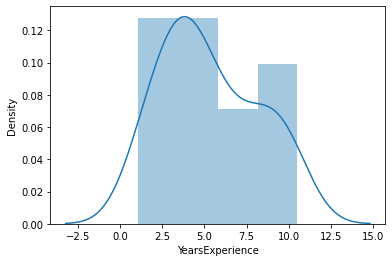

In [4]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


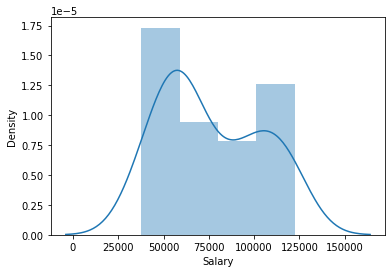

In [5]:
import seaborn as sns
sns.distplot(data['Salary'])

Fitting a Linear Regression Model

In [6]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


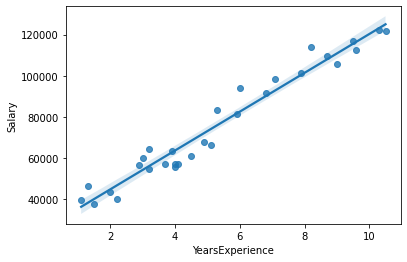

In [7]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [8]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [9]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [10]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for new data point

In [11]:
#Predict for 2.2 and 3.5 YearsExperience
newdata=pd.Series([2.2,3.5])

In [12]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [13]:
model.predict(data_pred)

0    46582.117306
1    58867.068324
dtype: float64